In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Machine_EDA.csv to Machine_EDA.csv


In [ ]:
df= pd.read_csv("Machine_EDA.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Target            10000 non-null  int64  
 7   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [ ]:
df1= df[:]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Target            10000 non-null  int64  
 7   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [ ]:
#Creating Dummies of Categorical Variables and dropping 1st dummy variable

Catg_vars =['Type', 'Failure_Type']

In [ ]:
for i in Catg_vars:
    Catg_list = 'var'+'_'+i
    Catg_list = pd.get_dummies(df[i], drop_first=True, prefix = i)
    df2 = df1.join(Catg_list)
    df1 = df2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Target            10000 non-null  int64  
 7   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          10000 non-null  object 
 1   Air_temp                      10000 non-null  float64
 2   Process_temp                  10000 non-null  float64
 3   Rotational_speed              10000 non-null  float64
 4   Torque                        10000 non-null  float64
 5   Tool_wear                     10000 non-null  int64  
 6   Target                        10000 non-null  int64  
 7   Failure_Type                  10000 non-null  object 
 8   Type_L                        10000 non-null  uint8  
 9   Failure_Type_Random Failures  10000 non-null  uint8  
dtypes: float64(4), int64(2), object(2), uint8(2)
memory usage: 644.7+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          10000 non-null  object 
 1   Air_temp                      10000 non-null  float64
 2   Process_temp                  10000 non-null  float64
 3   Rotational_speed              10000 non-null  float64
 4   Torque                        10000 non-null  float64
 5   Tool_wear                     10000 non-null  int64  
 6   Target                        10000 non-null  int64  
 7   Failure_Type                  10000 non-null  object 
 8   Type_L                        10000 non-null  uint8  
 9   Failure_Type_Random Failures  10000 non-null  uint8  
dtypes: float64(4), int64(2), object(2), uint8(2)
memory usage: 644.7+ KB


In [ ]:
#After Creating dummies and dropping 1st dummy now drop original variable
Catg_vars = ['Type', 'Failure_Type']

In [ ]:
df_vars = df1.columns.values.tolist()

In [ ]:
to_keep = [i for i in df_vars if i not in Catg_vars] 
# keep only those which are not in the list of data_vars

In [ ]:
df_final = df1[to_keep]

In [ ]:
df_final.columns.values

array(['Air_temp', 'Process_temp', 'Rotational_speed', 'Torque',
       'Tool_wear', 'Target', 'Type_L', 'Failure_Type_Random Failures'],
      dtype=object)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Air_temp                      10000 non-null  float64
 1   Process_temp                  10000 non-null  float64
 2   Rotational_speed              10000 non-null  float64
 3   Torque                        10000 non-null  float64
 4   Tool_wear                     10000 non-null  int64  
 5   Target                        10000 non-null  int64  
 6   Type_L                        10000 non-null  uint8  
 7   Failure_Type_Random Failures  10000 non-null  uint8  
dtypes: float64(4), int64(2), uint8(2)
memory usage: 488.4 KB


In [ ]:
X = df_final.loc[:, df_final.columns!= 'Target']
y = df_final.loc[:, df_final.columns== 'Target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Air_temp                      10000 non-null  float64
 1   Process_temp                  10000 non-null  float64
 2   Rotational_speed              10000 non-null  float64
 3   Torque                        10000 non-null  float64
 4   Tool_wear                     10000 non-null  int64  
 5   Type_L                        10000 non-null  uint8  
 6   Failure_Type_Random Failures  10000 non-null  uint8  
dtypes: float64(4), int64(1), uint8(2)
memory usage: 410.3 KB


In [ ]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
y.value_counts()

Target
0         9661
1          339
dtype: int64

In [ ]:
''' Splitting the data into Train & Test (70-30 respectively) '''

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
train = X_train.join(y_train)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 7681 to 2732
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Air_temp                      7000 non-null   float64
 1   Process_temp                  7000 non-null   float64
 2   Rotational_speed              7000 non-null   float64
 3   Torque                        7000 non-null   float64
 4   Tool_wear                     7000 non-null   int64  
 5   Type_L                        7000 non-null   uint8  
 6   Failure_Type_Random Failures  7000 non-null   uint8  
 7   Target                        7000 non-null   int64  
dtypes: float64(4), int64(2), uint8(2)
memory usage: 716.5 KB


In [ ]:
no_failure = train[train.Target == 0] 
len(no_failure)

6760

In [ ]:
yes_failure = train[train.Target == 1] 
len(yes_failure)

240

In [ ]:
from sklearn.utils import resample

In [ ]:
# Smote is done - over sampling
yes_failure_os = resample(yes_failure,
                          replace = True, 
                          n_samples = len(no_failure),
                          random_state = 14)

In [ ]:
train_os = pd.concat([no_failure, yes_failure_os])

In [ ]:
train_os.Target.value_counts()

1    6760
0    6760
Name: Target, dtype: int64

In [ ]:
X_train_os = train_os.loc[:, train_os.columns != 'Target']
y_train_os = train_os.loc[:, train_os.columns == 'Target']

**Recurrsive Feature Elimination**

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=10000000)

In [ ]:
rfe = RFE(logreg, n_features_to_select=2)

In [ ]:
rfe = rfe.fit(X_train_os, y_train_os.values.ravel())

In [ ]:
rfe.n_features_to_select

2

In [ ]:
X_train_os.columns[rfe.get_support()]

Index(['Type_L', 'Failure_Type_Random Failures'], dtype='object')

In [ ]:
cols = X_train_os.columns[rfe.get_support()]


In [ ]:
cols.to_list()


['Type_L', 'Failure_Type_Random Failures']

**Logistic Model by statistic apporach**

In [ ]:
#________________________________sm model to see p_values 
x1 = X_train_os[cols] 

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13520 entries, 7681 to 4646
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Type_L                        13520 non-null  uint8
 1   Failure_Type_Random Failures  13520 non-null  uint8
dtypes: uint8(2)
memory usage: 132.0 KB


In [ ]:
y_train_os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13520 entries, 7681 to 4646
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Target  13520 non-null  int64
dtypes: int64(1)
memory usage: 211.2 KB


In [ ]:
y_train_os.value_counts()

Target
1         6760
0         6760
dtype: int64

In [ ]:
y1 = y_train_os

In [ ]:
y1

,Target
7681,0
9031,0
3691,0
202,0
5625,0
...,...
4527,1
3266,1
6540,1
3528,1


In [ ]:
#____________Stats model
import statsmodels.api as sm

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13520 entries, 7681 to 4646
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Type_L                        13520 non-null  uint8
 1   Failure_Type_Random Failures  13520 non-null  uint8
dtypes: uint8(2)
memory usage: 132.0 KB


In [ ]:
y1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13520 entries, 7681 to 4646
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Target  13520 non-null  int64
dtypes: int64(1)
memory usage: 211.2 KB


In [ ]:
logit_model = sm.Logit(y1,x1)

In [ ]:
result = logit_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.165894
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


In [ ]:
print(result.summary2())

                               Results: Logit
Model:                   Logit                Pseudo R-squared:     0.761    
Dependent Variable:      Target               AIC:                  4489.7701
Date:                    2021-11-29 11:22     BIC:                  4504.7940
No. Observations:        13520                Log-Likelihood:       -2242.9  
Df Model:                1                    LL-Null:              -9371.3  
Df Residuals:            13518                LLR p-value:          0.0000   
Converged:               1.0000               Scale:                1.0000   
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------
Type_L                        4.2784   0.1269  33.7243 0.0000  4.0297  4.5270
Failure_Type_Random Failures -8.0638   0.1644 -49.0608 0.0000 -8.3859 -7.7416



**Logistic model by SK learn method**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
logreg= LogisticRegression(solver= 'sag')
logreg.fit(x1, y1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='sag')

In [ ]:
## X_test should alsso have only 2 columns
X_test2= X_test[cols]

In [ ]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 9394 to 5233
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Type_L                        3000 non-null   uint8
 1   Failure_Type_Random Failures  3000 non-null   uint8
dtypes: uint8(2)
memory usage: 29.3 KB


In [ ]:
y_pred= logreg.predict(X_test2)

In [ ]:
log_score= logreg.score(X_test2, y_test)

In [ ]:
print("Accuracy of logistic regression classifier on test data:{}".format(log_score))

Accuracy of logistic regression classifier on test data:0.998


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2901    0]
 [   6   93]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2901
           1       1.00      0.94      0.97        99

    accuracy                           1.00      3000
   macro avg       1.00      0.97      0.98      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test2))
logit_roc_auc

0.9696969696969697

In [ ]:
""  Area under curve is 0.96   ""

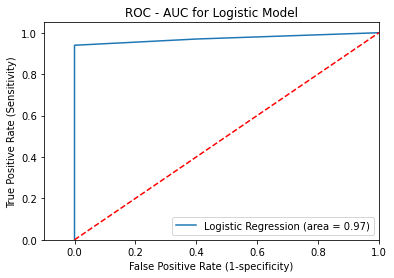

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC - AUC for Logistic Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Decision Tree Model **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Target            10000 non-null  int64  
 7   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [ ]:
df2=df[:]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Target            10000 non-null  int64  
 7   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [ ]:
df2.Type.value_counts()

L    6000
H    4000
Name: Type, dtype: int64

In [ ]:
df2['Type'].replace('L', '1', inplace = True)
df2['Type'].replace('H', '2', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df2.Type.value_counts()

1    6000
2    4000
Name: Type, dtype: int64

In [ ]:
df2.Failure_Type.value_counts()

Random Failures             9670
Heat Dissipation Failure     330
Name: Failure_Type, dtype: int64

In [ ]:
df2['Failure_Type'].replace('Random Failures','1',inplace = True)
df2['Failure_Type'].replace('Heat Dissipation Failure','2',inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df2.Failure_Type.value_counts()

1    9670
2     330
Name: Failure_Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [ ]:
df2['Type']= LE.fit_transform(df2['Type'])
df2['Failure_Type']= LE.fit_transform(df2['Failure_Type'])
df2

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
0,1,298.1,308.6,1551.0,42.8,0,0,0
1,0,298.2,308.7,1408.0,46.3,3,0,0
2,0,298.1,308.5,1498.0,49.4,5,0,0
3,0,298.2,308.6,1433.0,39.5,7,0,0
4,0,298.2,308.7,1408.0,40.0,9,0,0
...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604.0,29.5,14,0,0
9996,1,298.9,308.4,1632.0,31.8,17,0,0
9997,1,299.0,308.6,1645.0,33.4,22,0,0
9998,1,299.0,308.7,1408.0,48.5,25,0,0


In [ ]:
X = df2.loc[:, df2.columns != 'Target']
y = df2.loc[:, df2.columns == 'Target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  int64  
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Failure_Type      10000 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 547.0 KB


In [ ]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
'''Fit Tree'''
#train test - split 

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#fit tree on train data
#model
clf = DecisionTreeClassifier()

In [ ]:
#Fit Classifier model on train set 
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Predict/estimate_train  X_train
y_pred_train = clf.predict(X_train)

In [ ]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Predict/estimate_test  X_test
y_pred_test = clf.predict(X_test)

In [ ]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#See the train 
from sklearn import tree

[Text(223.2, 203.85, 'X[6] <= 0.5\ngini = 0.066\nsamples = 7000\nvalue = [6760, 240]'),
 Text(200.88, 176.67000000000002, 'X[1] <= 303.55\ngini = 0.001\nsamples = 6763\nvalue = [6760, 3]'),
 Text(111.6, 149.49, 'X[4] <= 27.35\ngini = 0.001\nsamples = 6432\nvalue = [6430, 2]'),
 Text(44.64, 122.31, 'X[4] <= 27.25\ngini = 0.003\nsamples = 640\nvalue = [639, 1]'),
 Text(22.32, 95.13, 'gini = 0.0\nsamples = 621\nvalue = [621, 0]'),
 Text(66.96000000000001, 95.13, 'X[5] <= 140.5\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(44.64, 67.94999999999999, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(89.28, 67.94999999999999, 'X[5] <= 166.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(66.96000000000001, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.6, 40.77000000000001, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(178.56, 122.31, 'X[5] <= 20.5\ngini = 0.0\nsamples = 5792\nvalue = [5791, 1]'),
 Text(156.24, 95.13, 'X[5] <= 19.5\ngini = 0.003\nsampl

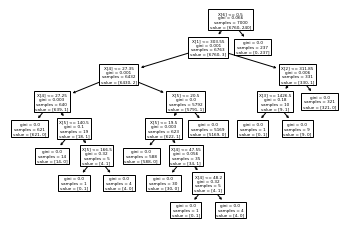

In [ ]:
tree.plot_tree(clf.fit(X_train, y_train))

In [ ]:
#Model has learnt unneccesaary things 
#Need to optimize

from sklearn.metrics import accuracy_score

In [ ]:
print(round(accuracy_score(y_train,y_pred_train), 2))

1.0


In [ ]:
print(round(accuracy_score(y_test,y_pred_test), 2))

1.0


In [ ]:
# Accuracy of train data is 1
# Accuracy of test data is 1

In [ ]:
from sklearn import tree

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)


In [ ]:
path

{'ccp_alphas': array([0.00000000e+00, 7.14063611e-05, 9.51705829e-05, 6.53636455e-02]),
 'impurities': array([0.        , 0.00057125, 0.00085676, 0.06622041])}

In [ ]:
alphas = path['ccp_alphas']

In [ ]:
alphas

array([0.00000000e+00, 7.14063611e-05, 9.51705829e-05, 6.53636455e-02])

In [ ]:
acrcy_train, acrcy_test = [],[]
for i in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=i)    
    
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    acrcy_train.append(accuracy_score(y_train, y_pred_train))
    acrcy_test.append(accuracy_score(y_test,y_pred_test))

In [ ]:
acrcy_train

[1.0, 0.9997142857142857, 0.9995714285714286, 0.9657142857142857]

In [ ]:
acrcy_test

[0.998, 0.998, 0.998, 0.967]

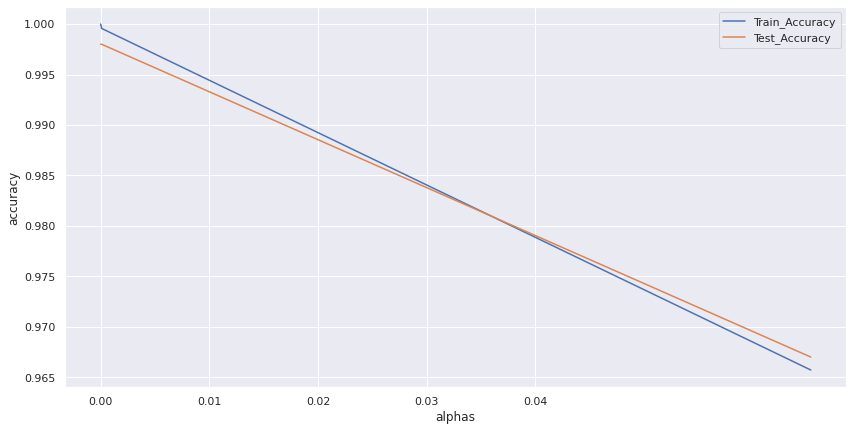

In [ ]:
# now we have scores
# lets, plot

sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y =acrcy_train, x = alphas, label = 'Train_Accuracy')
sns.lineplot(y =acrcy_test, x = alphas, label = 'Test_Accuracy')
plt.xticks(ticks=np.arange(0.00,0.05,0.01))
plt.xlabel('alphas')
plt.ylabel('accuracy')
plt.show()

In [ ]:
#_________with ccp = 0.035
clf = DecisionTreeClassifier(ccp_alpha=0.035, random_state = 14)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.035, random_state=14)

In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
y_pred_test = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_train,y_pred_train), 2))

1.0


In [ ]:
print(round(accuracy_score(y_test,y_pred_test), 2))

1.0


In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[2901    0]
 [   6   93]]


In [ ]:
### Classification Report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2901
           1       1.00      0.94      0.97        99

    accuracy                           1.00      3000
   macro avg       1.00      0.97      0.98      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
###########################  ROC AUC Curve 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
predictedProbability = clf.predict_proba(X_test)[:, 1]
fpr,tpr, thresholds = metrics.roc_curve(y_test, predictedProbability)


In [ ]:
fpr

array([0., 0., 1.])

In [ ]:
tpr

array([0.        , 0.93939394, 1.        ])

In [ ]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 4.43590123e-04])

In [ ]:
dff = pd.DataFrame(dict(fpr = fpr,tpr = tpr))
auc = auc(fpr,tpr)
auc

0.9696969696969697

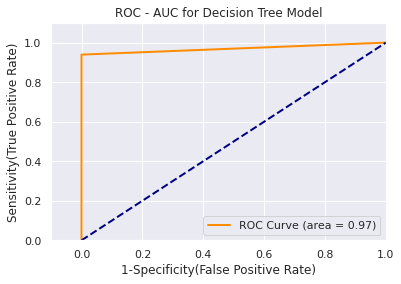

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw =lw, label = 'ROC Curve (area = %0.2f)' %auc)
plt.plot([0,1],[0,1], color='navy', lw = lw, linestyle = '--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title("ROC - AUC for Decision Tree Model")
plt.legend(loc = "lower right")
plt.show()

**Random Forest**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Target            10000 non-null  int64  
 7   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [ ]:
df2=df[:]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Target            10000 non-null  int64  
 7   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [ ]:
df2.Type.value_counts()

1    6000
2    4000
Name: Type, dtype: int64

In [ ]:
df2.Type.value_counts()

1    6000
2    4000
Name: Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()


In [ ]:
df2['Type']= LE.fit_transform(df2['Type'])
df2['Failure_Type']= LE.fit_transform(df2['Failure_Type'])
df2

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
0,1,298.1,308.6,1551.0,42.8,0,0,0
1,0,298.2,308.7,1408.0,46.3,3,0,0
2,0,298.1,308.5,1498.0,49.4,5,0,0
3,0,298.2,308.6,1433.0,39.5,7,0,0
4,0,298.2,308.7,1408.0,40.0,9,0,0
...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604.0,29.5,14,0,0
9996,1,298.9,308.4,1632.0,31.8,17,0,0
9997,1,299.0,308.6,1645.0,33.4,22,0,0
9998,1,299.0,308.7,1408.0,48.5,25,0,0


In [ ]:
X = df2.loc[:, df2.columns != 'Target']
y = df2.loc[:, df2.columns == 'Target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  int64  
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Failure_Type      10000 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 547.0 KB


In [ ]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
'''Fit Tree'''
#train test - split 

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
#import the classifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Create Classifier object 
#in our previous experiment, we found ccp_alphas = 0.013 has the best accuarcy 
clf_rf = RandomForestClassifier(n_estimators =100, ccp_alpha= 0.035, random_state = 14)

In [ ]:
#fit the classifier with x and y  data = train
mod_rf = clf_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
#Prediction 
y_train_pred = mod_rf.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Prediction 
y_test_pred = mod_rf.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train,y_train_pred), 2))

0.97


In [ ]:
print(round(accuracy_score(y_test,y_test_pred), 2))

0.97


In [ ]:
#_____________________________ Extract Feature Importance 
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': mod_rf.feature_importances_}).\
    sort_values('importance', ascending = False)

In [ ]:
fi.head()

,feature,importance
6,Failure_Type,1.0
0,Type,0.0
1,Air_temp,0.0
2,Process_temp,0.0
3,Rotational_speed,0.0


In [ ]:
# Accuarcy 2 cells above is 0.97 & 0.97 for Train & test (respectively)
# This accuracy is for having all columns as features in our model
# Lets build a model keeping 1 best features 
# that is keeping Failure_Type only
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Create Classifier object 
#in our previous experiment Decision Tree model, 
#we found ccp_alphas = 0.035 has the best accuarcy 
clf_rf1 = RandomForestClassifier(n_estimators =100, ccp_alpha= 0.035, random_state = 14)

In [ ]:
# fit the classifier with x and y data=TRAIN, 
#this time with Failure_Type only
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 7681 to 2732
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7000 non-null   int64  
 1   Air_temp          7000 non-null   float64
 2   Process_temp      7000 non-null   float64
 3   Rotational_speed  7000 non-null   float64
 4   Torque            7000 non-null   float64
 5   Tool_wear         7000 non-null   int64  
 6   Failure_Type      7000 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 437.5 KB


In [ ]:
X_train1 = X_train.iloc[ : ,[6]]
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 7681 to 2732
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Failure_Type  7000 non-null   int64
dtypes: int64(1)
memory usage: 109.4 KB


In [ ]:
mod_rf1 = clf_rf1.fit(X_train1, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
#Prediction 
y_train_pred1 = mod_rf1.predict(X_train1)
y_train_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 9394 to 5233
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              3000 non-null   int64  
 1   Air_temp          3000 non-null   float64
 2   Process_temp      3000 non-null   float64
 3   Rotational_speed  3000 non-null   float64
 4   Torque            3000 non-null   float64
 5   Tool_wear         3000 non-null   int64  
 6   Failure_Type      3000 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 187.5 KB


In [ ]:
X_test1 = X_test.iloc[ : ,[6]]
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 9394 to 5233
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Failure_Type  3000 non-null   int64
dtypes: int64(1)
memory usage: 46.9 KB


In [ ]:
#Prediction 
y_test_pred1 = mod_rf1.predict(X_test1)
y_test_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(round(accuracy_score(y_train,y_train_pred1), 2))

1.0


In [ ]:
print(round(accuracy_score(y_test,y_test_pred1), 2))

1.0


In [ ]:
### There is no much difference in accuarcy 
#Earlier train accuracy = 1 now with 4 features its 0.97
#Earlier test accuracy = 1 now with 4 features its 0.97

In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_test_pred1)
print(confusion_matrix)

[[2901    0]
 [   6   93]]


In [ ]:
### Classification Report
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2901
           1       1.00      0.94      0.97        99

    accuracy                           1.00      3000
   macro avg       1.00      0.97      0.98      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
###########################  ROC AUC Curve 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
predictedProbability1 = mod_rf1.predict_proba(X_test1)[:, 1]
fpr,tpr, thresholds = metrics.roc_curve(y_test, predictedProbability1)

In [ ]:
fpr

array([0., 0., 1.])

In [ ]:
tpr

array([0.        , 0.93939394, 1.        ])

In [ ]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 4.31891628e-04])

In [ ]:
dff1 = pd.DataFrame(dict(fpr = fpr,tpr = tpr))
auc1 = auc(fpr,tpr)
auc1

0.9696969696969697

In [ ]:
''' Area Under Curve is 0.96 '''

' Area Under Curve is 0.96 '

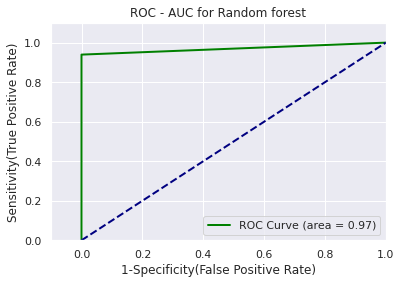

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'green',
         lw =lw, label = 'ROC Curve (area = %0.2f)' %auc1)
plt.plot([0,1],[0,1], color='navy', lw = lw, linestyle = '--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title("ROC - AUC for Random forest")
plt.legend(loc = "lower right")
plt.show()

**Gradient Boosting - Model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Target            10000 non-null  int64  
 7   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [ ]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 7681 to 2732
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Failure_Type  7000 non-null   int64
dtypes: int64(1)
memory usage: 109.4 KB


In [ ]:
GB = GradientBoostingClassifier()

In [ ]:
GB_mod = GB.fit(X_train1, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Prediction
y_train_GB = GB_mod.predict(X_train1)
y_train_GB

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 9394 to 5233
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Failure_Type  3000 non-null   int64
dtypes: int64(1)
memory usage: 46.9 KB


In [ ]:
# Prediction
y_test_GB = GB_mod.predict(X_test1)
y_test_GB

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(round(accuracy_score(y_train, y_train_GB), 2))

1.0


In [ ]:
print(round(accuracy_score(y_test, y_test_GB), 2))

1.0


In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_test_GB)
print(confusion_matrix)

[[2901    0]
 [   6   93]]


In [ ]:
### Classification Report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_test_GB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2901
           1       1.00      0.94      0.97        99

    accuracy                           1.00      3000
   macro avg       1.00      0.97      0.98      3000
weighted avg       1.00      1.00      1.00      3000



**Knowing your Nearest Neighbours(KNN)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Target            10000 non-null  int64  
 7   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [ ]:
df3= df[:]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Target            10000 non-null  int64  
 7   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [ ]:
df3.Type.value_counts()

1    6000
2    4000
Name: Type, dtype: int64

In [ ]:
df3['Type'].replace('L', '1', inplace = True)
df3['Type'].replace('H', '2', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df3.Type.value_counts()

1    6000
2    4000
Name: Type, dtype: int64

In [ ]:
df3.Failure_Type.value_counts()

1    9670
2     330
Name: Failure_Type, dtype: int64

In [ ]:
X = df3.loc[:, df3.columns != 'Target']
y = df3.loc[:, df3.columns == 'Target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 547.0+ KB


In [ ]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Building Model @ n_neighbors = 4

knn = KNeighborsClassifier(n_neighbors = 4)
print(knn) 
mpm_knn = knn.fit(X_train, y_train) 
print(mpm_knn)

KNeighborsClassifier(n_neighbors=4)
KNeighborsClassifier(n_neighbors=4)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Applying on Test data for prediction
y_pred_KNN = mpm_knn.predict(X_test)
print(y_pred_KNN)

[0 0 0 ... 0 0 0]


In [ ]:
#Prediction Score
mpm_knn.score(X_test, y_test)

0.9683333333333334

In [ ]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_KNN) 

0.9683333333333334

In [ ]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
cm

array([[2893,    8],
       [  87,   12]])

In [ ]:
### Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2901
           1       0.60      0.12      0.20        99

    accuracy                           0.97      3000
   macro avg       0.79      0.56      0.59      3000
weighted avg       0.96      0.97      0.96      3000



**SVM**

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Target            10000 non-null  int64  
 7   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [ ]:
df3.Type.value_counts()

1    6000
2    4000
Name: Type, dtype: int64

In [ ]:
X = df3.loc[:, df3.columns != 'Target']
y = df3.loc[:, df3.columns == 'Target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              10000 non-null  object 
 1   Air_temp          10000 non-null  float64
 2   Process_temp      10000 non-null  float64
 3   Rotational_speed  10000 non-null  float64
 4   Torque            10000 non-null  float64
 5   Tool_wear         10000 non-null  int64  
 6   Failure_Type      10000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 547.0+ KB


In [ ]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
# splitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
svm_model= svm.SVC(kernel='linear', C=1, gamma='auto', probability= True).fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_SVM = svm_model.predict(X_test)

In [ ]:
# model accuracy for X_test 
accuracy = svm_model.score(X_test, y_test)
print(accuracy)

0.998


In [ ]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_SVM)
cm


array([[2901,    0],
       [   6,   93]])

In [ ]:
### Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2901
           1       1.00      0.94      0.97        99

    accuracy                           1.00      3000
   macro avg       1.00      0.97      0.98      3000
weighted avg       1.00      1.00      1.00      3000



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
gnb_predictions = gnb.predict(X_test)

In [ ]:
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.998


In [ ]:
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
cm


array([[2901,    0],
       [   6,   93]])

In [ ]:
### Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2901
           1       1.00      0.94      0.97        99

    accuracy                           1.00      3000
   macro avg       1.00      0.97      0.98      3000
weighted avg       1.00      1.00      1.00      3000

